In [ ]:
%config IPCompleter.greedy=True
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np

import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

from keras import Sequential
from keras.models import Model, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras import regularizers

from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

import xgboost, lightgbm
from mlxtend.classifier import EnsembleVoteClassifier
from imblearn.over_sampling import SMOTE



# data preprocessing step

In [ ]:
train = pd.read_csv("UNSW_NB15_training-set.csv")
test = pd.read_csv("UNSW_NB15_testing-set.csv")
#combined_data = pd.concat([train, test]).drop(['id'],axis=1)

In [ ]:
train_x = train.iloc[:,1:-2]
train_y = train.iloc[:,-1]

In [ ]:
le = LabelEncoder()

train_x['proto'] = le.fit_transform(train_x['proto'])
train_x['service'] = le.fit_transform(train_x['service'])
train_x['state'] = le.fit_transform(train_x['state'])

In [ ]:
train_x.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,2,2,1,3,0,0,0,2,3,0


In [ ]:
test_x = train.iloc[:,1:-2]
test_y = train.iloc[:,-1]
test_x['proto'] = le.fit_transform(test_x['proto'])
test_x['service'] = le.fit_transform(test_x['service'])
test_x['state'] = le.fit_transform(test_x['state'])

In [ ]:
test_x.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,2,2,1,3,0,0,0,2,3,0


# Class imbalance check

In [ ]:
import collections

print(collections.Counter(test_y))

smote = SMOTE()
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

Counter({1: 45332, 0: 37000})


In [ ]:
#import collections
#print(collections.Counter(test_x))

# Deep learning model for intrusion detection

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train

In [ ]:
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x, test_y))

Epoch 1/10
644/644 [==============================] - 3s 3ms/step - loss: 2170284.5000 - accuracy: 0.6436 - val_loss: 1524068.0000 - val_accuracy: 0.7197
Epoch 2/10
644/644 [==============================] - 2s 3ms/step - loss: 981437.8750 - accuracy: 0.6658 - val_loss: 869723.1250 - val_accuracy: 0.7098
Epoch 3/10
644/644 [==============================] - 2s 3ms/step - loss: 789148.0625 - accuracy: 0.6792 - val_loss: 326077.5938 - val_accuracy: 0.7528
Epoch 4/10
644/644 [==============================] - 2s 3ms/step - loss: 554146.3750 - accuracy: 0.6861 - val_loss: 362724.4688 - val_accuracy: 0.7373
Epoch 5/10
644/644 [==============================] - 2s 3ms/step - loss: 450828.1562 - accuracy: 0.6899 - val_loss: 383698.1562 - val_accuracy: 0.7228
Epoch 6/10
644/644 [==============================] - 2s 3ms/step - loss: 311923.0000 - accuracy: 0.6882 - val_loss: 298434.7812 - val_accuracy: 0.7522
Epoch 7/10
644/644 [==============================] - 2s 3ms/step - loss: 205896.0469 

# Test your model

In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 28320.31640625
Test accuracy: 0.6379779577255249


In [ ]:
y_pred = model.predict(test_x)

2573/2573 [==============================] - 2s 882us/step


In [ ]:
#print(y_pred.shape)

(82332, 2)


In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
model.evaluate(test_x, test_y)

2573/2573 [==============================] - 3s 1ms/step - loss: 28320.3164 - accuracy: 0.6380


[28320.31640625, 0.6379779577255249]

# Performance metrics
- Accuracy
- F1
- Sensitivity (TPR)
- Specificity (TNR)
- Confusion m

In [ ]:
y_pred = y_pred.flatten()

In [ ]:
print(type(test_y))
#print(type(y_pred))
print(test_y[:10])  # Print the first 10 elements of test_y for inspection
#print(y_pred[:10])  # Print the first 10 elements of y_pred for inspection


<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64


In [ ]:
y_pred = np.array(y_pred) 

In [ ]:
y_pred_binary = (y_pred >= 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(test_y, y_pred_binary)

In [ ]:
classification_report_output = classification_report(test_y, y_pred_binary)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

Accuracy: 0.6379779429626391
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.74      0.65     37000
           1       0.72      0.56      0.63     45332

    accuracy                           0.64     82332
   macro avg       0.65      0.65      0.64     82332
weighted avg       0.66      0.64      0.64     82332



In [ ]:
accuracy = accuracy_score(test_y, y_pred_binary)
f1 = f1_score(test_y, y_pred_binary)
confusion = confusion_matrix(test_y, y_pred_binary)
classification_report_output = classification_report(test_y, y_pred_binary)

In [ ]:
TP = confusion[1, 1]
FN = confusion[1, 0]
sensitivity = TP / (TP + FN)

In [ ]:
TN = confusion[0, 0]
FP = confusion[0, 1]
specificity = TN / (TN + FP)

In [ ]:
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Sensitivity (TPR):", sensitivity)
print("Specificity (TNR):", specificity)
print("Confusion Matrix:\n", confusion)
print('Classification Report:\n', classification_report_output)

Accuracy: 0.6907754903746888
F1-score: 0.7066820276497696
Sensitivity (TPR): 0.6778649574538623
Specificity (TNR): 0.7065246697222971
Confusion Matrix:
 [[5241 2177]
 [2915 6134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67      7418
           1       0.74      0.68      0.71      9049

    accuracy                           0.69     16467
   macro avg       0.69      0.69      0.69     16467
weighted avg       0.70      0.69      0.69     16467



<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

<Axes: >

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

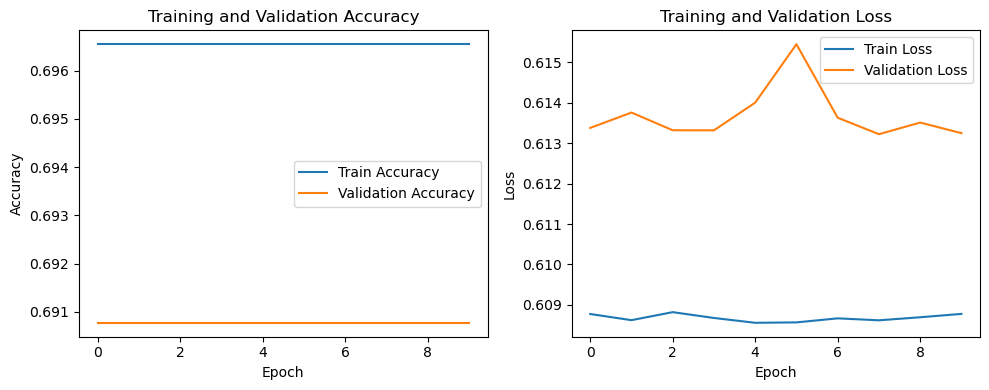

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
confusion = confusion_matrix(test_y, y_pred_binary)

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Labels')

Text(104.7222222222223, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

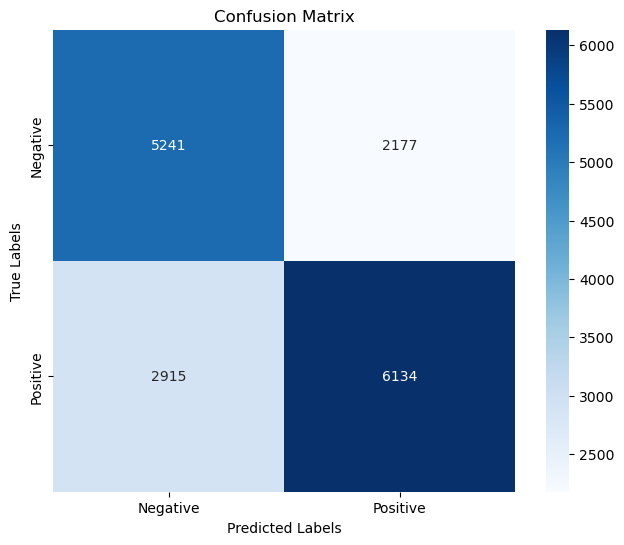

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()